### Analysis_of_African_Conflict_Dataset_(1997_to_2020)

In [1]:
#!pip install folium geopandas wordcloud

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import IFrame
import folium
from folium import plugins
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('/content/conflicts_africa_1997-2020.csv')
df.head()

,ISO,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34966,"-0,29",1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226


In [4]:
# Number of rows and columns
df.shape

(65535, 29)

The dataset has 65,535 rows and 29 columns. This means that the dataset contains information for 65,535 individual instances or observations, with each observation having 29 different variables associated with it.

In [5]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               65535 non-null  int64 
 1   event_id_cnty     65535 non-null  object
 2   event_id_no_cnty  65535 non-null  int64 
 3   event_date        65535 non-null  object
 4   year              65535 non-null  int64 
 5   time_precision    65535 non-null  int64 
 6   event_type        65535 non-null  object
 7   sub_event_type    65535 non-null  object
 8   actor1            65535 non-null  object
 9   assoc_actor_1     12768 non-null  object
 10  inter1            65535 non-null  int64 
 11  actor2            50346 non-null  object
 12  assoc_actor_2     11167 non-null  object
 13  inter2            65535 non-null  int64 
 14  interaction       65535 non-null  int64 
 15  region            65535 non-null  object
 16  country           65535 non-null  object
 17  admin1      

In [6]:
df.nunique()

ISO                    20
event_id_cnty       65535
event_id_no_cnty    20329
event_date           8244
year                   25
time_precision          3
event_type              6
sub_event_type         25
actor1               1645
assoc_actor_1        1866
inter1                  8
actor2               1402
assoc_actor_2        2069
inter2                  9
interaction            43
region                  5
country                20
admin1                317
admin2               1832
admin3               2672
location             8381
latitude             6456
longitude            6506
geo_precision           3
source               4129
source_scale           23
notes               55547
fatalities            205
timestamp            1552
dtype: int64

In [7]:
# Check for missing values
df.isnull().sum()

ISO                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       52767
inter1                  0
actor2              15189
assoc_actor_2       54368
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                  0
admin3              13204
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                2604
fatalities              0
timestamp               0
dtype: int64

The dataset contains information on various variables such as event ID, event date, event type, actors involved, location, latitude, longitude, fatalities, and more. The dataset has missing values in some columns, such as `associated actors` and `event notes`.

In [8]:
# Remove irrelevant features and columns with high missing values
df.drop(columns=['ISO', 'event_id_cnty', 'event_id_no_cnty', 'assoc_actor_1', 'assoc_actor_2', 'timestamp'], inplace=True)
df.columns

Index(['event_date', 'year', 'time_precision', 'event_type', 'sub_event_type',
       'actor1', 'inter1', 'actor2', 'inter2', 'interaction', 'region',
       'country', 'admin1', 'admin2', 'admin3', 'location', 'latitude',
       'longitude', 'geo_precision', 'source', 'source_scale', 'notes',
       'fatalities'],
      dtype='object')

In [9]:
# Replace NaN with 'Unknown' and 'Not Available'
df['actor2'].fillna('Unknown', inplace=True)
df['admin3'].fillna('Unknown', inplace=True)
df['notes'].fillna('Not Available', inplace=True)

In [10]:
# Convert dates to datetime
month_map = {
    'janvier': 'January',
    'février': 'February',
    'mars': 'March',
    'avril': 'April',
    'mai': 'May',
    'juin': 'June',
    'juillet': 'July',
    'août': 'August',
    'septembre': 'September',
    'octobre': 'October',
    'novembre': 'November',
    'décembre': 'December'
}

df['event_date'] = df['event_date'].replace(month_map, regex=True)
df['event_date'] = pd.to_datetime(df['event_date'], format='%d-%B-%Y')
df['year'] = df['event_date'].dt.year
#df['month'] = df['event_date'].dt.month
#df['day'] = df['event_date'].dt.day

In [38]:
# Convert latitude and longitude columns to float
df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)

In [11]:
# Summary of statistics
df.describe()

,year,time_precision,inter1,inter2,interaction,geo_precision,fatalities
count,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
mean,2012.979553,1.127092,3.236698,3.412558,31.378759,1.275578,5.922957
std,7.195726,0.394759,1.959817,2.959861,18.248049,0.515145,55.833148
min,1997.000000,1.000000,1.000000,0.000000,10.000000,1.000000,0.000000
25%,2008.000000,1.000000,1.000000,1.000000,13.000000,1.000000,0.000000
50%,2016.000000,1.000000,3.000000,2.000000,27.000000,1.000000,0.000000
75%,2019.000000,1.000000,5.000000,7.000000,44.000000,1.000000,1.000000
max,2021.000000,3.000000,8.000000,8.000000,88.000000,3.000000,1350.000000


In [12]:
df.sample(3)

,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,actor2,inter2,interaction,...,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
48994,2019-11-27,2019,1,Violence against civilians,Attack,Mayi Mayi Militia,3,Civilians (Democratic Republic of Congo),7,37,...,Mambasa,Babila-Babombi,Biakato,853,29258,1,Reuters,International,"On 27 November 2019, alleged Mayi-Mayi fighter...",2
29150,2014-12-01,2014,1,Strategic developments,Non-violent transfer of territory,FPRC: Popular Front for the Renaissance of Cen...,3,Unknown,0,30,...,Kaga-Bandoro,Kaga-Bandoro,Kaga-Bandoro,"6,99",19192,1,RCA (Central African Republic),National,"The FPRC, a political party headed by a former...",0
3106,2013-03-18,2013,1,Protests,Protest with intervention,Protesters (Algeria),6,Police Forces of Algeria (1999-),1,16,...,Sidi M'Hamed,Unknown,Algiers,36752,3042,1,Al Jazeera,Regional,Algerian security forces have held 20 youths w...,0


In [13]:
categorical_cols = ['event_type', 'sub_event_type',
                    'actor1', 'actor2', 'region',
                    'admin1', 'admin2', 'source', 'source_scale']
for col in categorical_cols:
    cat_cols = df[col].value_counts()

In [14]:
cat_cols

National                     23779
International                13092
Other                         7030
Regional                      6316
Local partner-Other           5167
New media                     2894
Subnational                   2466
National-International        1474
New media-National             742
National-Regional              481
Other-Regional                 418
Regional-International         300
Other-National                 268
Subnational-National           266
Subnational-Regional           231
Other-International            186
Other-New media                124
New media-International        109
Local partner-New media         63
New media-Subnational           55
Subnational-International       36
Other-Subnational               22
New media-Regional              16
Name: source_scale, dtype: int64

#### Distribution of Event types

In [15]:
# Calculate frequency distribution of event_type
event_type_counts = df['event_type'].value_counts()
print(event_type_counts)

Battles                       20148
Violence against civilians    18449
Protests                      13719
Riots                          5768
Strategic developments         5258
Explosions/Remote violence     2193
Name: event_type, dtype: int64


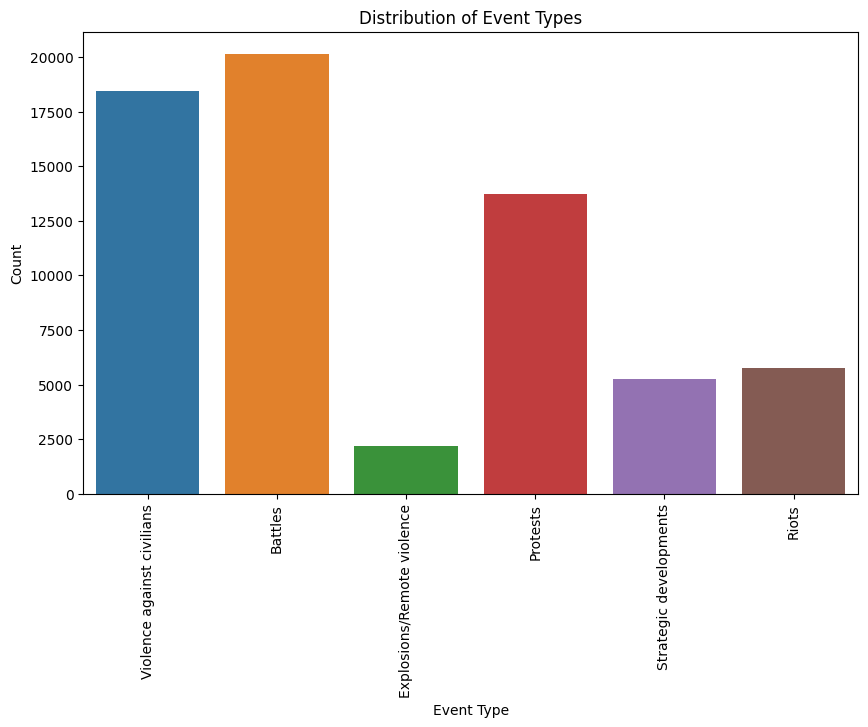

In [16]:
# Visualize event_type using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='event_type')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

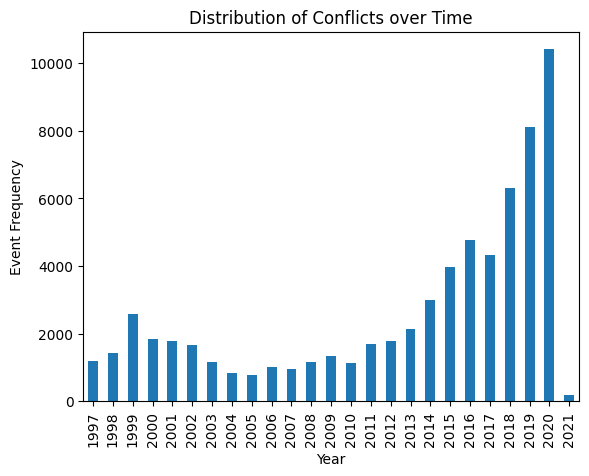

In [17]:
# frequency of events by year
events_by_year = df['year'].value_counts().sort_index()
events_by_year.plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Event Frequency')
plt.title('Distribution of Conflicts over Time')
plt.show()

In [29]:
fatalities_by_country = df.groupby('country')['fatalities'].sum().sort_values(ascending=False)
fatalities_by_country

country
Angola                          143816
Democratic Republic of Congo     62512
Eritrea                          54415
Ethiopia                         47816
Burundi                          23507
Central African Republic         14276
Algeria                          13690
Cameroon                          9161
Chad                              8581
Ivory Coast                       4129
Guinea                            3382
Kenya                             1103
Ghana                              652
Republic of Congo                  639
Benin                              158
Gambia                             147
Djibouti                            88
Equatorial Guinea                   43
Gabon                               36
Botswana                            10
Name: fatalities, dtype: int64

In [31]:
# Number of fatalities by Year
fatalities_by_year = df.groupby('year')['fatalities'].sum().sort_values(ascending=False)

In [32]:
# Top 5 countries with the highest number of fatalities
top_5_countries = fatalities_by_country.head(5)

# Top 5 years with the highest number of fatalities
top_5_years = fatalities_by_year.head(5)

In [33]:
top_5_countries

country
Angola                          143816
Democratic Republic of Congo     62512
Eritrea                          54415
Ethiopia                         47816
Burundi                          23507
Name: fatalities, dtype: int64

In [34]:
top_5_years

year
1999    155076
1998     60045
2001     18364
1997     16360
2002     15111
Name: fatalities, dtype: int64

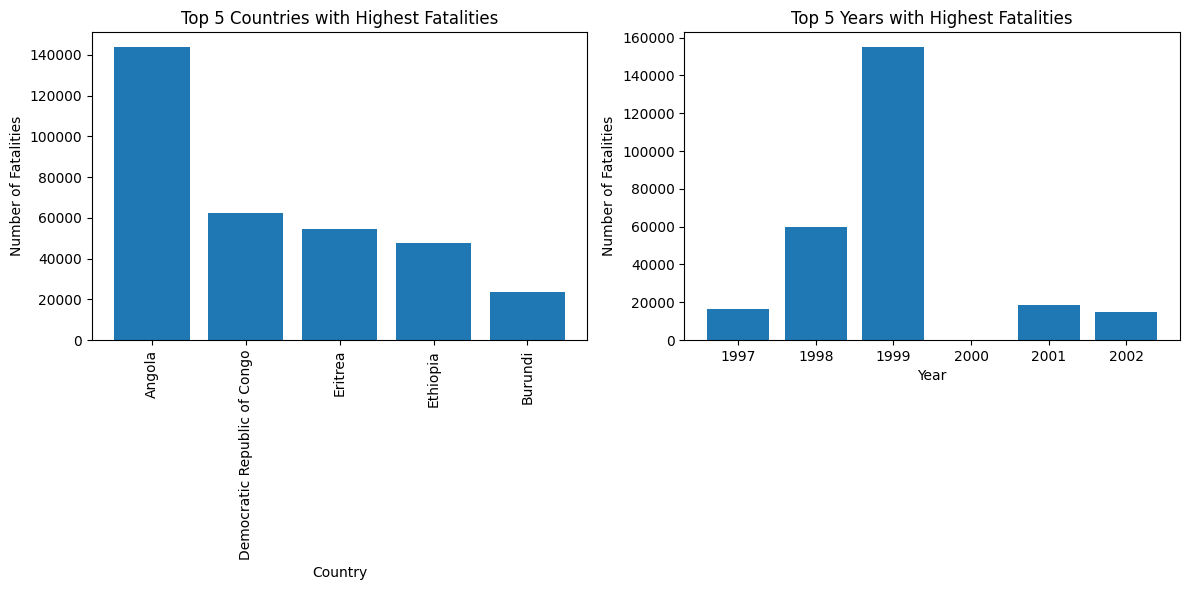

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot top 5 countries
axes[0].bar(top_5_countries.index, list(top_5_countries.values))
axes[0].set_title('Top 5 Countries with Highest Fatalities')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Fatalities')
axes[0].set_xticks(range(len(top_5_countries)))  # Set xticks to the index values
axes[0].set_xticklabels(top_5_countries.index, rotation=90)

# Plot top 5 years
axes[1].bar(top_5_years.index, top_5_years.values)
axes[1].set_title('Top 5 Years with Highest Fatalities')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Fatalities')

plt.tight_layout()

# Display the plots
plt.show()

In [43]:
# Create a map showing the conflicts in 1999
map_df = df[(df['year']==1999)] # Year 1999
event_locations = list(zip(map_df.latitude, map_df.longitude))

base_map = folium.Map(location=[2.318462, 19.56871], zoom_start=3)
heat_map = plugins.HeatMap(event_locations, radius=6, blur=2)
base_map.add_child(heat_map)

### Geospatial Analysis

#### Interactive map of conflict hotspots

In [39]:
# Create a map for distribution of events
map = folium.Map(location=[0, 0], zoom_start=2)

# Plot event locations on the map
for lat, lon in zip(df['latitude'], df['longitude']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
    ).add_to(map)

# Save the map to HTML file
map.save('event_map_1.html')

In [40]:
# Filter the data for locations in Africa
map_df = df[(df['latitude'] >= -35) & (df['latitude'] <= 37) & (df['longitude'] >= -26) & (df['longitude'] <= 63)]
event_locations = list(zip(map_df.latitude, map_df.longitude))
# Create a map centered on Africa
map = folium.Map(location=[8.7832, 34.5085], tiles='Stamen Terrain', zoom_start=3)

# Create a heatmap layer using the filtered data
heatmap_layer = plugins.HeatMap(data=map_df[['latitude', 'longitude']], radius=6, blur=2)

# Add the heatmap layer to the map
heatmap_layer.add_to(map);

In [41]:
# Save the map as an HTML file
map.save('africa_heatmap.html')

In [42]:
# Display the map
IFrame(src='africa_heatmap.html', width='100%', height='500px')

### Analyze event notes

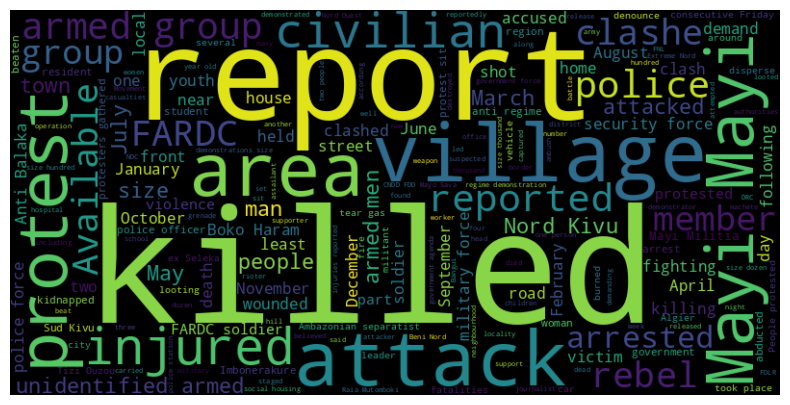

In [44]:
# Analyze event notes
from wordcloud import WordCloud
notes_text = ' '.join(df['notes'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(notes_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
# Top event actors
top_actors = pd.concat([df['actor1'], df['actor2']]).value_counts().head(10)
print(top_actors)

Unknown                                                            15189
Civilians (Democratic Republic of Congo)                            7110
Protesters (Algeria)                                                5961
Civilians (Burundi)                                                 5446
Military Forces of the Democratic Republic of Congo (2001-2019)     4035
UNITA: National Union for the Total Independence of Angola          2546
Unidentified Armed Group (Democratic Republic of Congo)             2495
Civilians (Central African Republic)                                2486
Military Forces of Ethiopia (1995-2018)                             2462
Military Forces of Angola (1975-)                                   2390
dtype: int64


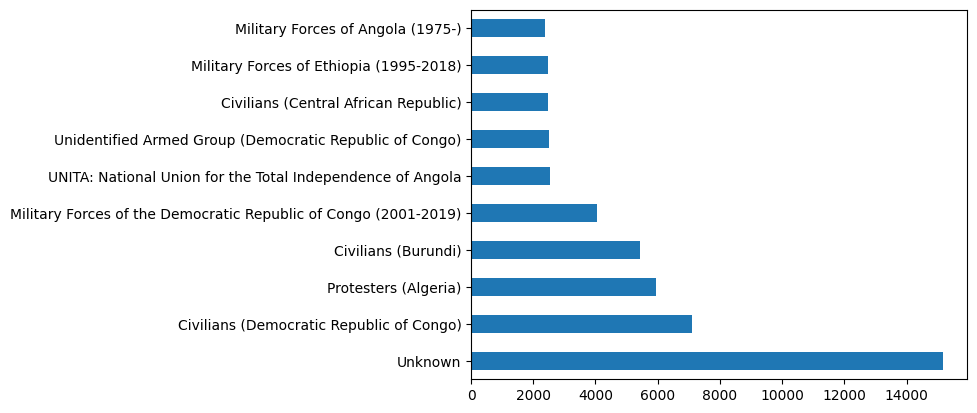

In [46]:
top_actors.plot(kind='barh');

In [47]:
# Total number of fatalities per event type recorded
fatalities_per_event_type = df.groupby(['event_type'])[['fatalities']].sum()
fatalities_per_event_type.sort_values(by=['fatalities'], axis=0, ascending=False)

,fatalities
event_type,
Battles,278613
Violence against civilians,89906
Explosions/Remote violence,13745
Riots,4342
Protests,1530
Strategic developments,25


<Axes: xlabel='event_type'>

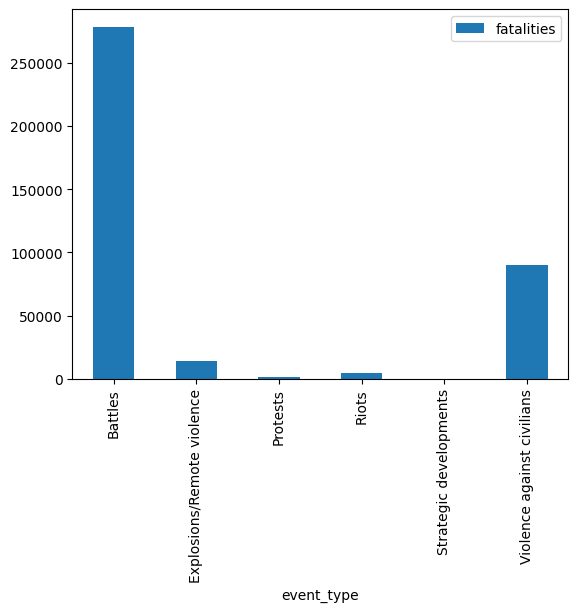

In [48]:
fatalities_per_event_type.plot(kind='bar')

In [49]:
# Exploring the total number of fatalities recorded per sub event type throught the dataset
fatalities_by_event = df.groupby(['event_type', 'sub_event_type'])[['fatalities']].sum()
fatalities_by_event

fatalities
event_type                 sub_event_type                                 
Battles                    Armed clash                              265601
                           Government regains territory               7417
                           Non-state actor overtakes territory        5595
Explosions/Remote violence Air/drone strike                           1388
                           Chemical weapon                               0
                           Grenade                                     618
                           Remote explosive/landmine/IED              3655
                           Shelling/artillery/missile attack          7181
                           Suicide bomb                                903
Protests                   Excessive force against protesters         1530
                           Peaceful protest                              0
                           Protest with intervention                     0
Riots                      Mob violence                               2295
                           Violent demonstration                      2047
Strategic developments     Abduction/forced disappearance                0
                           Agreement                                     0
                           Arrests                                       0
                           Change to group/activity                      0
                           Disrupted weapons use                        21
                           Headquarters or base established              0
                           Looting/property destruction                  0
                           Non-violent transfer of territory             0
                           Other                                         4
Violence against civilians Abduction/forced disappearance                0
                           Attack                                    88338
                           Sexual violence                            1568

**It is observed from above that in Peaceful protests abductions on some other sub event types recorded, the were 0(zero) number of fatalities record. This do not then mean there was no crime, it only tells us that there was no record of fatality when the crime such event was committed.**

### Record of Fatalities per Region and Country

In [51]:
# Number of Fatalities by Region
fatalities_by_region = df.groupby(['region'])[['fatalities']].sum()
fatalities_by_region

,fatalities
region,
Eastern Africa,126929
Middle Africa,239064
Northern Africa,13690
Southern Africa,10
Western Africa,8468


<Axes: xlabel='region'>

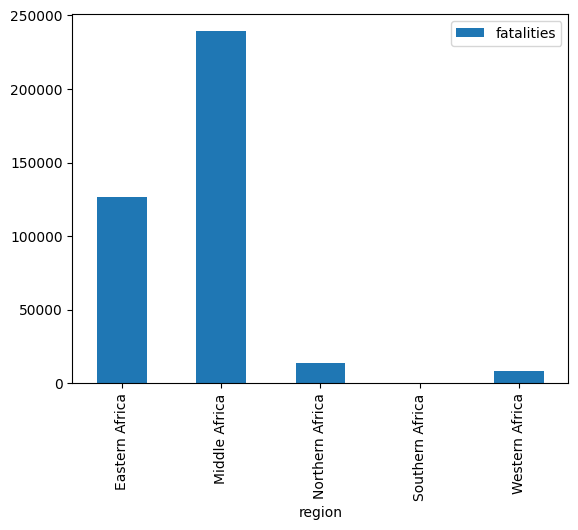

In [52]:
fatalities_by_region.plot(kind='bar')

**We could make the assumption that Eastern and Middle Africa, known for their hostility, are less peaceful than the Southern region of Africa.**

In [53]:
country_count = df.groupby('country')['country'].count().sort_values(axis=0, ascending=False)

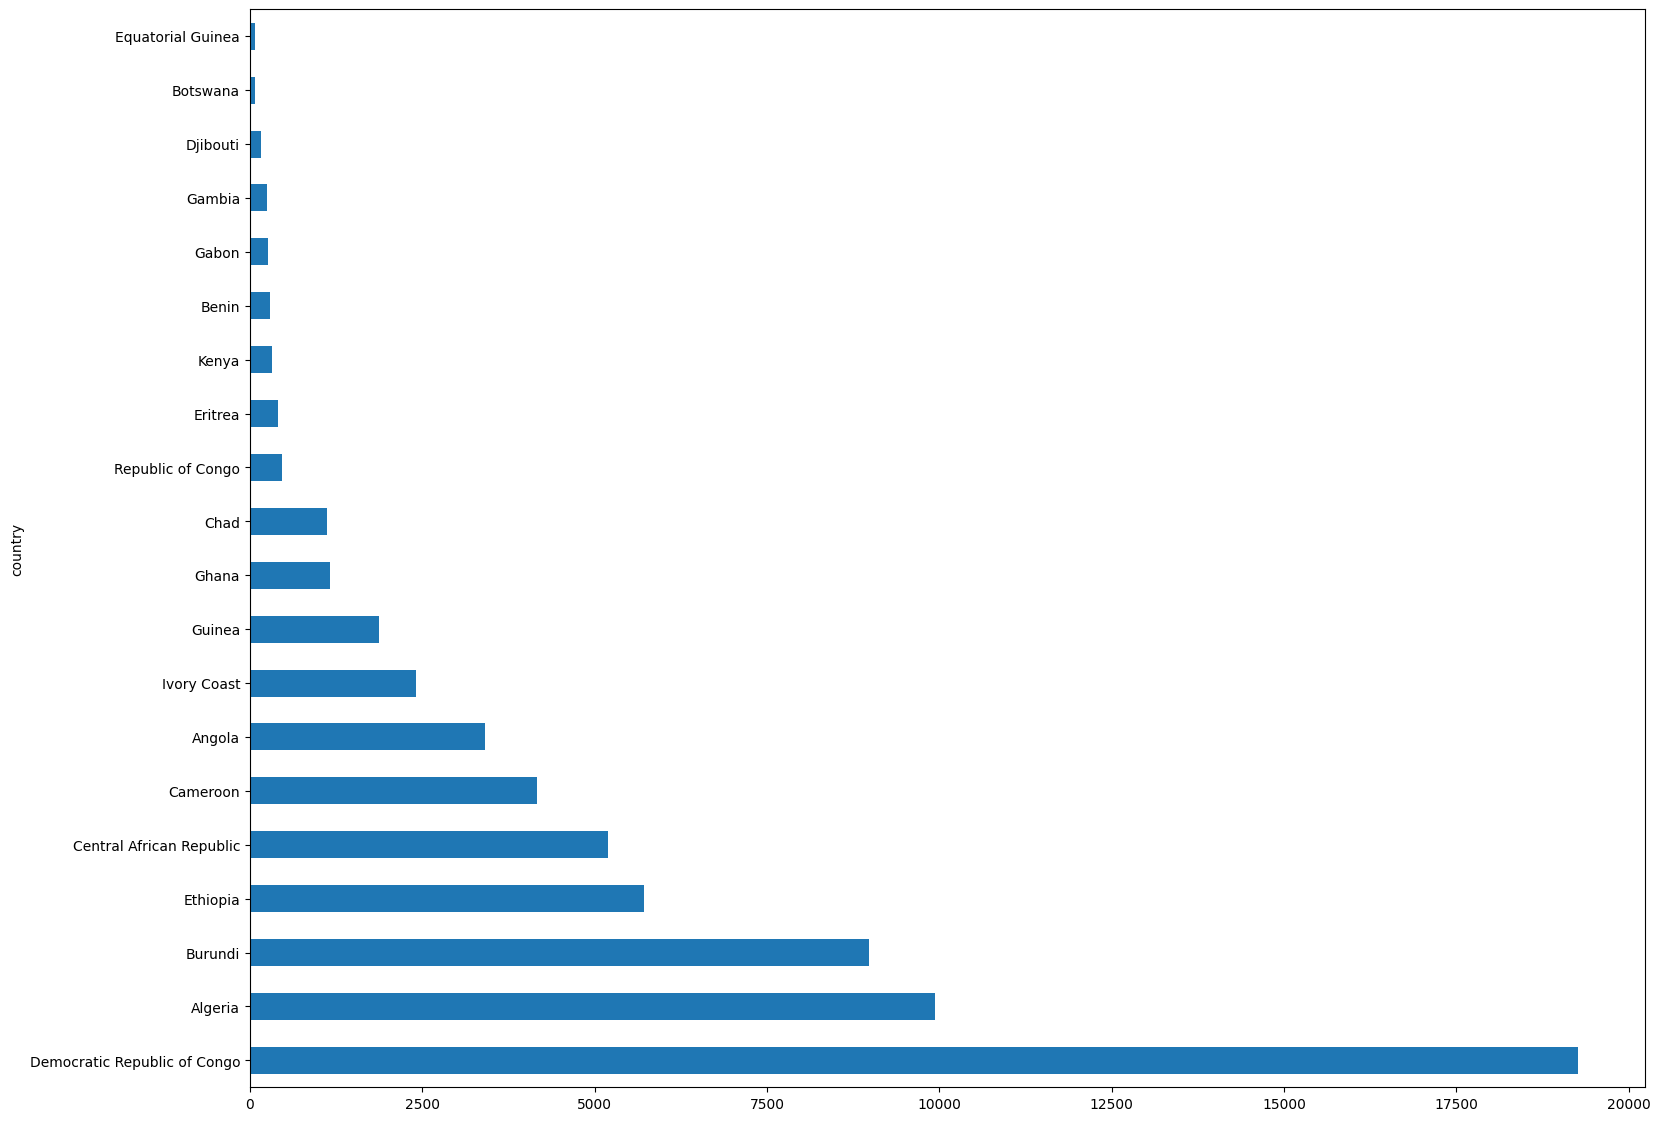

In [54]:
country_count.plot(kind='barh', figsize=(18,14));

### Perform time series decomposition to identify patterns or trends

In [55]:
# Perform time series decomposition to identify patterns or trends
ts = df['year'].value_counts().sort_index()
period = 12 # Specify the period length
df['event_date'] = pd.to_datetime(df['event_date'])
df.set_index('event_date', inplace=True)

# Perform time series decomposition
decomposition = seasonal_decompose(ts, model='additive', period=period)

# Access the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [56]:
import plotly.graph_objects as go

# Plot the trend component
fig = go.Figure(data=go.Scatter(x=trend.index, y=trend.values))
fig.update_layout(title='Trend Component', xaxis_title='Date', yaxis_title='Value')
fig.show()

# Plot the seasonal component
fig = go.Figure(data=go.Scatter(x=seasonal.index, y=seasonal.values))
fig.update_layout(title='Seasonal Component', xaxis_title='Date', yaxis_title='Value')
fig.show()

# Plot the residual component
fig = go.Figure(data=go.Scatter(x=residual.index, y=residual.values))
fig.update_layout(title='Residual Component', xaxis_title='Date', yaxis_title='Value')
fig.show()